In [1]:
%matplotlib inline

import numpy as np
import networkx as nx
import matplotlib
import re
import os
import sys
import time
import itertools
import seaborn
import matplotlib.pyplot as plt


import matplotlib.cm as cm
from matplotlib.colors import Normalize



from scipy.spatial.distance import pdist
clrs = seaborn.color_palette("RdBu_r",n_colors=9)
seaborn.set(style='ticks',font_scale=2)

sys.path.append("/Users/yves/Documents/Code/structural_knowledge/")
#import graph_transitions as gt

In [2]:
import graph_transitions as gt

In [3]:
all_graphs = gt.load_graphs()
possible_reward_locations = list(itertools.combinations(range(9),4))

/Users/yves/Documents/Code/structural_knowledge/graph_transitions


In [ ]:
ROOT = '/Users/Yves/Desktop/regular_graphs/regular_graphs/'

In [ ]:
pth = os.path.join(ROOT,sorted(os.listdir(ROOT))[-1])

In [ ]:
Ps = np.load(os.path.join(pth,'Ps.npy'))
Qs = np.load(os.path.join(pth,'Qs.npy'))
Vs = np.load(os.path.join(pth,'Vs.npy'))

graph_indices = np.load(os.path.join(pth,'graph_indices.npy'))
rew_indices = np.load(os.path.join(pth,'rew_indices.npy'))
rew_loop_lens = np.load(os.path.join(ROOT,'rew_loop_lens.npy'))

In [16]:
gIxs = []
for i in range(len(rew_loop_lens)):
    if np.sum(np.array(rew_loop_lens[i]))>=9:
        gIxs.append(i)

In [123]:
def load_rl_graph_stats(pth):
    """ Load Q values etc"""
    Ps = np.load(os.path.join(pth,'Ps.npy'))
    Qs = np.load(os.path.join(pth,'Qs.npy'))
    Vs = np.load(os.path.join(pth,'Vs.npy'))

    graph_indices = np.load(os.path.join(pth,'graph_indices.npy'))
    rew_indices = np.load(os.path.join(pth,'rew_indices.npy'))
    rew_loop_lens = np.load(os.path.join(ROOT,'rew_loop_lens.npy'))
    
    return Ps,Qs,Vs,graph_indices,rew_indices,rew_loop_lens

In [124]:
uu = load_rl_graph_stats(pth)

In [133]:
Vs[0].shape

(4, 9)

In [132]:
os.listdir(ROOT)

['gamma09', 'gamma07', 'gamma01', 'gamma03', 'gamma05', 'rew_loop_lens.npy']

In [141]:
def get_dists(Ps,Qs,Vs,gIxs):
    """ Get distances between optimal policies,
        Q values and state values
    """
    distsP = []
    distsV = []
    distsQ = []
    
    for tmpP,tmpQ,tmpV,kk in zip(*[Ps,Qs,Vs,range(len(Ps))]):
        
        distsP.append(np.mean(pdist(tmpP.reshape(4,18),metric='sqeuclidean')))
        distsQ.append(np.mean(pdist(tmpQ.reshape(4,18),metric='sqeuclidean')))
        distsV.append(np.mean(pdist(tmpV,metric='sqeuclidean')))
    return distsP,distsQ,distsV

In [143]:
res = {}
for pth_ in sorted(os.listdir(ROOT)):
    if 'gamma' in pth_: #don't deal with other random ones
        print("Running path: %s" %pth_)
        pth = os.path.join(ROOT,pth_)
        Ps,Qs,Vs,graph_indices,rew_indices,rew_loop_lens = load_rl_graph_stats(pth)
        distsP,distsQ,distsV = get_dists(Ps,Qs,Vs,gIxs)
        res[pth_ + '_distP'] = distsP
        res[pth_ + '_distQ'] = distsQ
        res[pth_ + '_distV'] = distsV
    else:
        pass

Running path: gamma01
Running path: gamma03
Running path: gamma05
Running path: gamma07
Running path: gamma09
Running path: rew_loop_lens.npy


NotADirectoryError: [Errno 20] Not a directory: '/Users/Yves/Desktop/regular_graphs/regular_graphs/rew_loop_lens.npy/Ps.npy'

In [173]:
np.corrcoef(res['gamma01_distP'],res['gamma01_distQ'])

array([[1.        , 0.61906295],
       [0.61906295, 1.        ]])

In [169]:
np.corrcoef(res['gamma03_distP'],res['gamma03_distQ'])

array([[1.        , 0.57141518],
       [0.57141518, 1.        ]])

In [165]:
np.corrcoef(res['gamma05_distV'],res['gamma09_distQ'])

array([[1.        , 0.65404951],
       [0.65404951, 1.        ]])

In [159]:
np.corrcoef(res['gamma09_distQ'],res['gamma05_distQ'])

array([[1.        , 0.47827386],
       [0.47827386, 1.        ]])

In [166]:
np.corrcoef(res['gamma09_distV'],res['gamma05_distV'])

array([[1.        , 0.58518396],
       [0.58518396, 1.        ]])

0.9169693985338502


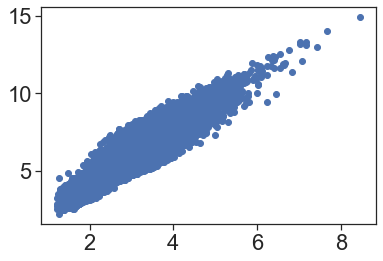

In [313]:
plt.scatter(res['gamma05_distV'][::20],res['gamma05_distQ'][::20])
print(np.corrcoef(res['gamma05_distV'],res['gamma05_distQ'])[0,1])

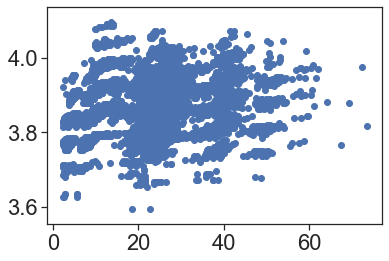

In [180]:
plt.scatter(res['gamma09_distQ'][::50],res['gamma01_distQ'][::50])

In [119]:
len(diffStore)

507885

In [120]:
len(Ps)

628488

Text(0.5, 0, 'distance$^2$ between optimal policies')

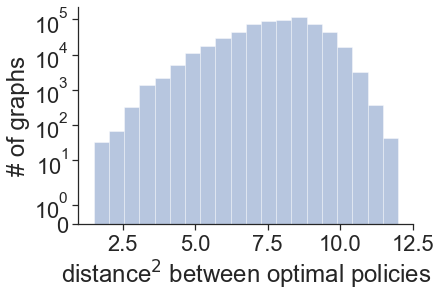

In [272]:
seaborn.distplot([i for i in np.array(res['gamma09_distP'].copy()) if i!=-10],kde=0,bins=20)
seaborn.despine()
plt.yscale('symlog')

plt.ylabel("# of graphs")
plt.xlabel("distance$^2$ between optimal policies")

In [221]:
gw = graphworld(all_graphs[graph_indices[np.argmax(diffStore)]])
#possible_reward_locations[graph_indices[np.argmax(diffStore)][]

In [222]:
gw.build_nx_graph()

302088
(1, 2, 5, 7)
2
10.333333333333334


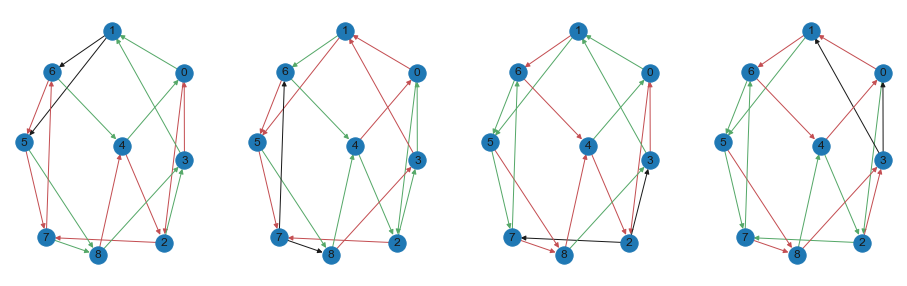

In [111]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
gw.plot_policy_onto_graph(Ps[np.argmax(diffStore)][0],pos=nx.layout.kamada_kawai_layout(gw.G))

plt.subplot(1,4,2)
gw.plot_policy_onto_graph(Ps[np.argmax(diffStore)][1],pos=nx.nx.layout.kamada_kawai_layout(gw.G))


plt.subplot(1,4,3)
gw.plot_policy_onto_graph(Ps[np.argmax(diffStore)][2],pos=nx.nx.layout.kamada_kawai_layout(gw.G))

plt.subplot(1,4,4)
gw.plot_policy_onto_graph(Ps[np.argmax(diffStore)][3],pos=nx.nx.layout.kamada_kawai_layout(gw.G))

print(np.argmax(diffStore))
print(possible_reward_locations[rew_indices[np.argmax(diffStore)]])
print(allLD[np.argmax(diffStore)][-1])
print(diffStore[np.argmax(diffStore)])

In [264]:
tmp  = np.array(res['gamma09_distP'].copy())
tmp[rew_loop_lens.sum(axis=1)<8] = -100
sel_graph = np.argsort(tmp)[-2]#np.argmax(tmp)

In [265]:
gw = gt.graphworld(all_graphs[graph_indices[sel_graph]])
#possible_reward_locations[graph_indices[np.argmax(diffStore)][]

In [266]:
res['gamma09_distQ'][sel_graph]

4.688430168431853

In [267]:
gw.build_nx_graph()

609119


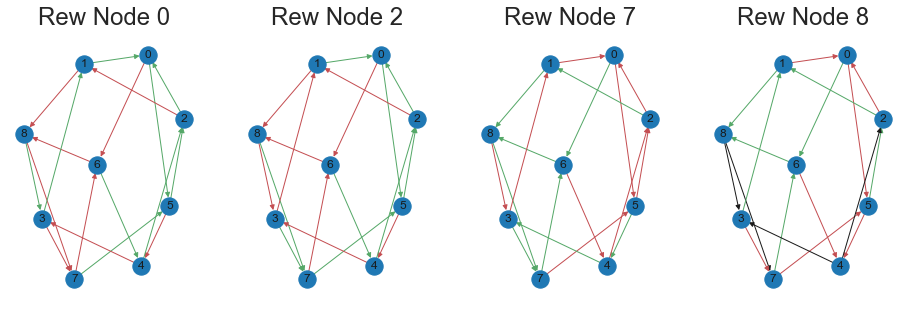

In [269]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plt.title("Rew Node %s" %possible_reward_locations[rew_indices[sel_graph]][0])
gw.plot_policy_onto_graph(Ps[sel_graph][0],pos=nx.layout.kamada_kawai_layout(gw.G))

plt.subplot(1,4,2)
plt.title("Rew Node %s" %possible_reward_locations[rew_indices[sel_graph]][1])

gw.plot_policy_onto_graph(Ps[sel_graph][1],pos=nx.nx.layout.kamada_kawai_layout(gw.G))


plt.subplot(1,4,3)
plt.title("Rew Node %s" %possible_reward_locations[rew_indices[sel_graph]][2])

gw.plot_policy_onto_graph(Ps[sel_graph][2],pos=nx.nx.layout.kamada_kawai_layout(gw.G))

plt.subplot(1,4,4)
plt.title("Rew Node %s" %possible_reward_locations[rew_indices[sel_graph]][3])

gw.plot_policy_onto_graph(Ps[sel_graph][3],pos=nx.nx.layout.kamada_kawai_layout(gw.G))

print(sel_graph)
#print(possible_reward_locations[rew_indices[sel_graph]])
#print(allLD[sel_graph][-1])
#print(diffStore[sel_graph])

#  Try coloring nodes

In [306]:
cmap = cm.RdBu
norm = Normalize(vmin=np.min(Vs[graph_indices[sel_graph]][0])-.2, 
                 vmax=np.max(Vs[graph_indices[sel_graph]][0])+.2)
gw = graphworld(all_graphs[graph_indices[sel_graph]])
gw.build_nx_graph()

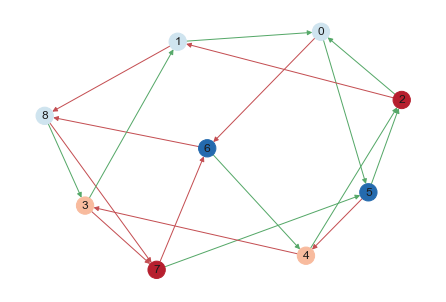

In [307]:
gw.plot_policy_onto_graph(Ps[sel_graph][0],pos=nx.layout.kamada_kawai_layout(gw.G),
                          node_colors=[cmap(norm(i)) for i in Vs[graph_indices[sel_graph]][0]])


In [312]:
Vs[graph_indices[sel_graph]][0]

array([4.73684211, 5.26315789, 5.26315789, 4.73684211, 4.73684211,
       3.83684211, 4.26315789, 3.83684211, 4.26315789])

In [295]:
possible_reward_locations[rew_indices[sel_graph]]

(0, 2, 7, 8)

In [282]:
Vs[graph_indices[sel_graph]][0]

array([4.73684211, 5.26315789, 5.26315789, 4.73684211, 4.73684211,
       3.83684211, 4.26315789, 3.83684211, 4.26315789])

# Test Code

In [218]:
import numpy as np
import re
import networkx as nx


class graphworld(object):
    """ To do list:
            incorporate the random transitions
            make the final state absorbing
    """
    def __init__(self,graph_spec,nNodes=9,nActions=2,teleport_probability=.0,build_nx_graph=False):
        
        self.graph_spec = graph_spec
        self.edges, self.edge_transitions = self.read_gunnar_graph(self.graph_spec)

        self.terminal_states = []
        self.rewards = np.zeros(self.nNodes)
        self.teleport_probability = teleport_probability
        self.build_trans_mat()
        
        if build_nx_graph:
            self.G = nx.DiGraph()
            self.G.add_edges_from(self.edges)

        
    def set_reward_state(self,nodeNr,terminal=False):
        "right now handles setting one state as the rewarded one"
        assert (nodeNr<= self.nNodes)
        
        #reinitialise
        self.rewards = np.zeros(self.nNodes)
        self.terminal_states = []
        
        #set values
        self.rewards[nodeNr] = 1.
        if terminal:
            self.terminal_states.append(nodeNr)
        self.build_trans_mat()

    def read_gunnar_graph(self,g_spec):
        """convert output of gunnar algorithm to list of list of edges
            as well as a matrix defining the transitions as a function
            of actions
        """


        nNodes,nEdges = g_spec.split(' ')[:2]
        self.nNodes = self.n_states = int(nNodes)
        self.nEdges = int(nEdges)
        self.nActions = int(float(nEdges)/float(nNodes))
        #print(self.nActions,self.nNodes)

        links = [int(i) for i in re.findall('[0-9]',g_spec[5:])]

        edges = []
        edge_set = np.zeros([self.nNodes,self.nActions],dtype='int')
        cntArr = np.zeros(self.nNodes,dtype='int')
        for fst,snd in zip(links[:-1][::2],links[1:][::2]):
            edges.append([fst,snd])
            edge_set[fst,cntArr[fst]] = snd
            cntArr[fst] += 1
        return edges,edge_set

    def build_trans_mat(self):
        self.trans_mat = np.zeros([self.nNodes,self.nActions,self.nNodes]) + self.teleport_probability/(self.nNodes-1.)
        for s in range(self.nNodes):
            if not s in self.terminal_states:
                for a in range(self.nActions):
                    self.trans_mat[s,a,self.edge_transitions[s,a]] = 1 - self.teleport_probability
            else:
                self.trans_mat[s] = 0
                
    def plot_policy_onto_graph(self,P,pos=None,node_colors=None):
        
        self.G = nx.DiGraph()
        self.G.add_edges_from(self.edges)

        colors = self._get_edge_colors(P)
        nx.draw(self.G,pos=pos,with_labels=True,edge_color=colors,node_color=node_colors)
    
    def build_nx_graph(self):
        self.G = nx.DiGraph()
        self.G.add_edges_from(self.edges)

        
    def _get_edge_colors(self,P):
        #What we want to do here is to 
        colors = ['k']*len(self.edges)
        for stateIx in range(self.n_states):
            p_ = P[stateIx]
            if p_[0]!=p_[1]:
                goodMove = np.argmax(p_)
                badMove = np.argmin(p_)

                good_edge = [stateIx,self.edge_transitions[stateIx,goodMove]]
                bad_edge = [stateIx,self.edge_transitions[stateIx,badMove]]

                good_edge_ix = [kk for kk,i in enumerate(self.G.edges) if list(i)==good_edge][0]
                bad_edge_ix = [kk  for kk,i in enumerate(self.G.edges) if list(i)==bad_edge][0]
                #print(good_edge,good_edge_ix)

                colors[good_edge_ix] = 'g'
                colors[bad_edge_ix] = 'r'
        return colors